# Week 5 day 2: MC Integration

## Objectives:

* Become familiar with 2D arrays
* Learn MC integration techniques

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2D arrays

Most of the array creation routines take lists or tuples for size:

In [2]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

You can also use nested lists or arrays to the normal constructor:

In [3]:
m = np.array([[1, 2], [3, 4]])
print(m)

[[1 2]
 [3 4]]


In [4]:
print(m[0, :], "==", m[0])

[1 2] == [1 2]


In [5]:
m[:, 0]

array([1, 3])

In [6]:
np.sum(m, axis=1)

array([3, 7])

In [7]:
np.sum(m, axis=1, keepdims=True)

array([[3],
       [7]])

## Area of a circle

$$
x^2 + y^2 \le 1
$$

In [8]:
xy = np.random.rand(2, 10000) * 2 - 1
valid = np.sum(xy ** 2, axis=0) < 1
good = xy[:, valid]
bad = xy[:, ~valid]

(-1.0999373004325848,
 1.099984558528224,
 -1.0996322779437848,
 1.099814818306315)

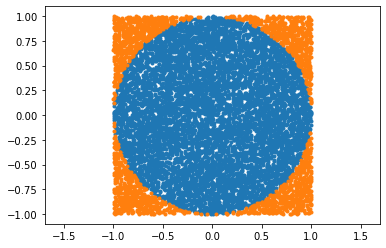

In [9]:
plt.plot(*good, ".")
plt.plot(*bad, ".")
plt.axis("equal")

In [10]:
np.mean(valid) * 4

3.1536

## Volume of a sphere:

In [11]:
xy = np.random.rand(2, 100000) * 2 - 1
r2 = np.sum(xy ** 2, axis=0)
r2[r2 > 1] = 1
print("MC:    ", np.mean(np.sqrt(1 - r2)) * 4 * 2)
print("Actual:", 4 / 3 * np.pi)

MC:     4.186083158623857
Actual: 4.1887902047863905


### 10 D example

$$
f(x) = \left(x_{1} + \cdots + x_{10}\right)^2
$$

In [12]:
def f(x):
    return np.sum(x, axis=0) ** 2

In [13]:
s = np.random.rand(10, 1000000)

In [14]:
np.mean(f(s))

25.826340350952517

In [15]:
155 / 6

25.833333333333332

Error estimate:

In [16]:
155 / 6 * 1 / np.sqrt(s.shape[1])

0.025833333333333333

## Difficult functions to integrate

In [17]:
from scipy import stats

df = 2.74

In [18]:
begin, end = stats.t.cdf([-100, 100], df)
print("Analytic:", end - begin)

Analytic: 0.9999941949856226


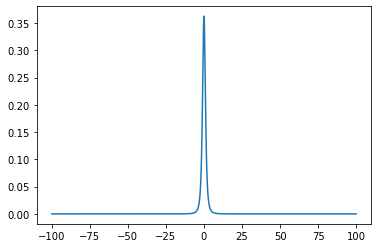

In [19]:
x = np.linspace(-100, 100, 1_000)
fig, ax = plt.subplots()
ax.plot(x, stats.t.pdf(x, df))
plt.show()

In [20]:
X = (np.random.rand(1000) - 0.5) * 200
np.mean(stats.t.pdf(X, df)) * 200

1.0073131016541101

In [21]:
1 / np.sqrt(1000)

0.03162277660168379

#### Variance reduction

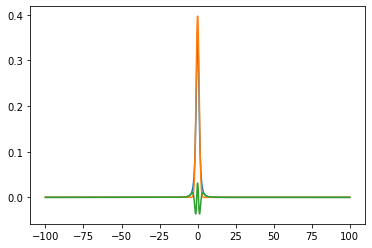

In [22]:
x = np.linspace(-100, 100, 1_000)
fig, ax = plt.subplots()
ax.plot(x, stats.t.pdf(x, df))
ax.plot(x, stats.norm.pdf(x, 0, 1))
ax.plot(x, stats.t.pdf(x, df) - stats.norm.pdf(x, 0, 1.2))
plt.show()

In [23]:
X = (np.random.rand(1000) - 0.5) * 200
Id = np.mean(stats.t.pdf(X, df) - stats.norm.pdf(X, 0, 1.2)) * 200
gaussInt = stats.norm.cdf(100, 0, 1.2) - stats.norm.cdf(-100, 0, 1.2)
print(Id + gaussInt)

1.0086732320144276


#### Importance sampling

In [24]:
Xg = np.random.normal(0, 1.2, 1000)
Xg = Xg[np.abs(Xg) <= 10]
print(len(Xg))
np.mean(stats.t.pdf(Xg, df) / stats.norm.pdf(Xg, 0, 1.2))

1000


0.9661111146296427

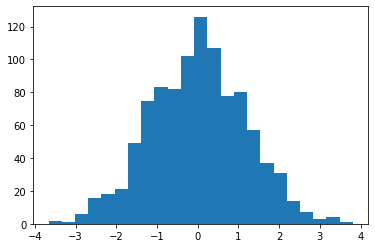

In [25]:
plt.hist(Xg, bins="auto")
plt.show()

## Von Neumann Rejection


In [26]:
Xy = np.random.rand(2, 10000)
Xy[0] -= 0.5
Xy[0] *= 10

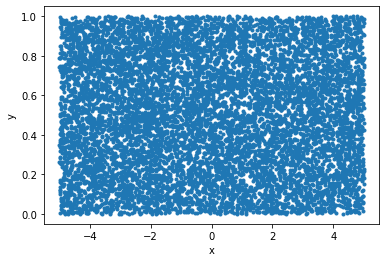

In [27]:
plt.plot(*Xy, ".")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [28]:
w0 = 0.5  # Must be higher than the maximum of the PDF
Xy[1] *= w0

In [29]:
valid = Xy[1] < stats.t.pdf(Xy[0], df)

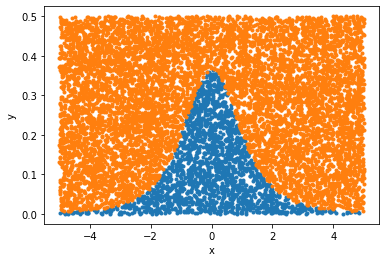

In [30]:
plt.plot(*Xy[:, valid], ".")
plt.plot(*Xy[:, ~valid], ".")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

It's not a great way to calculate an integral, but we can:

In [31]:
np.mean(valid) * w0 * 10

0.9755